## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('C:/Users/Nikitha/Email Performance Analytics _Data.xlsx')
df.head()

,Midascontactid,Createdat,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Segmentsecondary,Email.Acq.Dt,Email.Pref.Ch.Dt,Entry.Point.List,...,Eml.Click.First.Ts,Eml.Click.Last.Ts,Eml.Bounce.Last.Ts,Eml.Unsub.Last.Ts,Eml.Spam.Last.Ts,Email.Domain,Em.Pref.Status,Em.Pref.Dte,Invalid.Email.Dte,Em.Spamclplt.Dte
0,1020375449,2019-04-23,I,LIDUAS16,OOBWIN15,CON,NaN,2019-04-22,2019-08-24,|LIDUAS1608|OOBAND1407|OOBWIN1506|,...,2019-08-21,2019-08-21,NaT,NaT,NaT,gmail.com,I,2019-08-24,NaT,NaN
1,1042778096,2019-10-16,U,OOBWIN15,NaN,CON,NaN,NaT,2019-10-15,|OOBWIN1506|,...,NaT,NaT,NaT,NaT,NaT,hotmail.com,U,2019-10-15,NaT,NaN
2,1039527195,2019-07-29,I,NETMINNG,NETMINNG,CON,NaN,2019-07-29,2019-07-30,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,...,NaT,NaT,NaT,NaT,NaT,hotmail.com,I,2019-07-30,NaT,NaN
3,1008356168,2019-11-29,I,EPI2,EPI2,CON,NaN,2015-11-04,2019-11-29,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,...,2016-07-28,2016-08-06,NaT,2016-11-03,NaT,gmail.com,I,2019-11-29,NaT,NaN
4,1038164470,2019-04-30,U,OOBWIN15,NaN,CON,NaN,NaT,2019-04-29,|OOBWIN1506|,...,2019-05-26,2019-05-26,NaT,NaT,NaT,hotmail.com,U,2019-04-29,NaT,NaN


## Explore the data ...EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
Midascontactid                 10000 non-null int64
Createdat                      10000 non-null datetime64[ns]
Emailpermissionstatus          10000 non-null object
Cont.Acq.Src                   9943 non-null object
Email.Src.First                6274 non-null object
Segment                        10000 non-null object
Segmentsecondary               87 non-null object
Email.Acq.Dt                   6274 non-null datetime64[ns]
Email.Pref.Ch.Dt               9943 non-null datetime64[ns]
Entry.Point.List               9943 non-null object
Cont.Acq.Src2                  9943 non-null object
Cont.Acq.Dte                   9943 non-null datetime64[ns]
Prod.Buy.Last                  8480 non-null datetime64[ns]
Prod.Buy.First                 8480 non-null datetime64[ns]
Prod.Buy.Accessories           38 non-null datetime64[ns]
Prod.Buy.All.In.One.Desktop    260 non-null datetime64[ns

In [5]:
df.shape

(10000, 51)

## Checking for null values

In [6]:
df.isnull().sum()

Midascontactid                     0
Createdat                          0
Emailpermissionstatus              0
Cont.Acq.Src                      57
Email.Src.First                 3726
Segment                            0
Segmentsecondary                9913
Email.Acq.Dt                    3726
Email.Pref.Ch.Dt                  57
Entry.Point.List                  57
Cont.Acq.Src2                     57
Cont.Acq.Dte                      57
Prod.Buy.Last                   1520
Prod.Buy.First                  1520
Prod.Buy.Accessories            9962
Prod.Buy.All.In.One.Desktop     9740
Prod.Buy.Desktop                9590
Prod.Buy.Idc                    9477
Prod.Buy.Idpd                   5401
Prod.Buy.Laptop                 9914
Prod.Buy.Servers                9999
Prod.Buy.Software              10000
Prod.Buy.Thnkc                  9914
Prod.Buy.Thnkp                  9136
Prod.Buy.Warranties             9749
Prod.Buy.Workstation            9999
Prod.Buy.Android.Tablet         9998
P

In [7]:
df['Emailpermissionstatus'].value_counts() #Check the label counts

I    6282
U    3672
O      46
Name: Emailpermissionstatus, dtype: int64

In [8]:
Opt_in = df[df['Emailpermissionstatus']=='I']
Opt_out = df[df['Emailpermissionstatus']=='U']
Did_NOT = df[df['Emailpermissionstatus']=='O']

In [9]:
labels =['Opt_in','Opt_out','Did_NOT']

([<matplotlib.axis.XTick at 0x2546767aba8>,
 <a list of 3 Text xticklabel objects>)

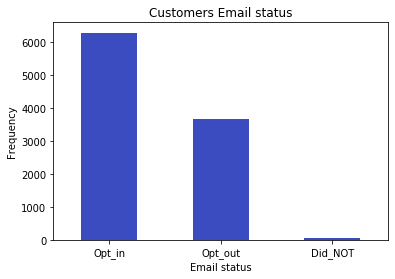

In [10]:
fig = pd.value_counts(df['Emailpermissionstatus'],sort=True)
fig.plot(kind='bar',rot=0,cmap='coolwarm')
plt.title('Customers Email status')
plt.xlabel('Email status')
plt.ylabel('Frequency')
plt.xticks(range(3),labels)

In [11]:
df.drop(['Midascontactid','Segmentsecondary','Prod.Buy.Accessories',             
'Prod.Buy.All.In.One.Desktop','Prod.Buy.Desktop','Prod.Buy.Idc',
'Prod.Buy.Laptop','Prod.Buy.Servers','Prod.Buy.Software','Prod.Buy.Thnkc',
'Prod.Buy.Thnkp','Prod.Buy.Warranties','Prod.Buy.Workstation','Prod.Buy.Android.Tablet',
'Prod.Buy.Windows.Tablet','Prod.Buy.Convertible','Prod.Buy.Android.Os','Prod.Buy.Gaming',
'Prod.Buy.Windows.Os','Prod.Buy.Gaming.Related','Eml.Bounce.Last.Ts','Eml.Unsub.Last.Ts',
'Invalid.Email.Dte','Em.Spamclplt.Dte','Eml.Spam.Last.Ts','Eml.Click.First.Ts','Eml.Click.Last.Ts'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
Createdat                10000 non-null datetime64[ns]
Emailpermissionstatus    10000 non-null object
Cont.Acq.Src             9943 non-null object
Email.Src.First          6274 non-null object
Segment                  10000 non-null object
Email.Acq.Dt             6274 non-null datetime64[ns]
Email.Pref.Ch.Dt         9943 non-null datetime64[ns]
Entry.Point.List         9943 non-null object
Cont.Acq.Src2            9943 non-null object
Cont.Acq.Dte             9943 non-null datetime64[ns]
Prod.Buy.Last            8480 non-null datetime64[ns]
Prod.Buy.First           8480 non-null datetime64[ns]
Prod.Buy.Idpd            4599 non-null datetime64[ns]
Country                  10000 non-null object
Eml.Sent.Num             9859 non-null float64
Eml.Sent.First.Ts        7879 non-null datetime64[ns]
Eml.Sent.Last.Ts         7879 non-null datetime64[ns]
Eml.Open.Num             9859 non

## Conclusion 1:Highest first time purchase is made by customer in year of '2019'

In [13]:
df['Prod.Buy.First Year']=pd.DatetimeIndex(df['Prod.Buy.First']).year
df['Prod.Buy.First Year'].value_counts()

2019.0    6597
2020.0    1581
2017.0      59
2016.0      51
2015.0      44
2013.0      36
2014.0      31
2018.0      27
2012.0      26
2011.0      14
2010.0      13
2009.0       1
Name: Prod.Buy.First Year, dtype: int64

## Conclusion2:Highest purchase made in month  of 'December'

In [14]:
df['Prod.Buy.First Month']=pd.DatetimeIndex(df['Prod.Buy.First']).month
df['Prod.Buy.First Month'].value_counts()

12.0    1424
9.0      968
8.0      840
11.0     832
1.0      791
2.0      688
10.0     647
7.0      619
6.0      523
5.0      457
4.0      452
3.0      239
Name: Prod.Buy.First Month, dtype: int64

In [15]:
##Fill missing values for Prod First purchase Year with '2019' and month with '12' as they rank highest
df['Prod.Buy.First Year']=pd.DatetimeIndex(df['Prod.Buy.First']).year.fillna(2019) 
df['Prod.Buy.First Month']=pd.DatetimeIndex(df['Prod.Buy.First']).month.fillna(12)
df['Prod.Buy.First Month'].value_counts()


12.0    2944
9.0      968
8.0      840
11.0     832
1.0      791
2.0      688
10.0     647
7.0      619
6.0      523
5.0      457
4.0      452
3.0      239
Name: Prod.Buy.First Month, dtype: int64

### Conclusion3:  Highest most recent  purchase is made by customer in year of '2019'

In [16]:
df['Prod.Buy.Last Year'] =pd.DatetimeIndex(df['Prod.Buy.Last']).year
df['Prod.Buy.Last Year'].value_counts()

2019.0    6697
2020.0    1694
2017.0      18
2016.0      16
2015.0      14
2018.0      13
2014.0      11
2013.0      10
2012.0       5
2011.0       1
2010.0       1
Name: Prod.Buy.Last Year, dtype: int64

### Conclusion 4: Highest most recent  purchase is made by customer in month of 'December'

In [17]:
df['Prod.Buy.Last Month'] =pd.DatetimeIndex(df['Prod.Buy.Last']).month
df['Prod.Buy.Last Month'].value_counts()

12.0    1509
9.0      989
8.0      837
1.0      818
11.0     744
2.0      702
10.0     660
7.0      599
6.0      514
5.0      439
4.0      438
3.0      231
Name: Prod.Buy.Last Month, dtype: int64

In [18]:
##Fill missing values for Prod Last purchase Year with '2019' and month with '12' as they rank highest
df['Prod.Buy.Last Year']=pd.DatetimeIndex(df['Prod.Buy.Last']).year.fillna(2019) 
df['Prod.Buy.Last Month']=pd.DatetimeIndex(df['Prod.Buy.Last']).month.fillna(12)
df['Prod.Buy.Last Month'].value_counts()


12.0    3029
9.0      989
8.0      837
1.0      818
11.0     744
2.0      702
10.0     660
7.0      599
6.0      514
5.0      439
4.0      438
3.0      231
Name: Prod.Buy.Last Month, dtype: int64

Text(0, 0.5, 'Purchase Count')

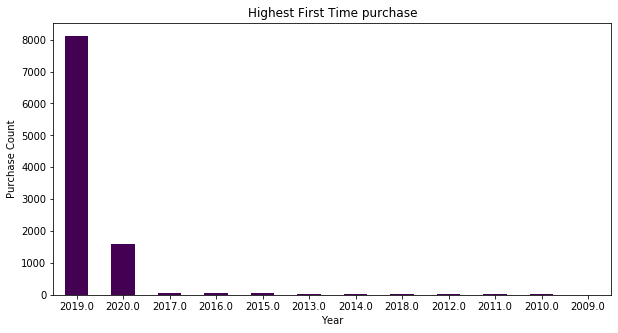

In [19]:
figure = plt.figure(figsize=(10,5))
fig = pd.value_counts(df['Prod.Buy.First Year'],sort=True)
fig.plot(kind='bar',rot=0,cmap='viridis')
plt.title('Highest First Time purchase')
plt.xlabel('Year')
plt.ylabel('Purchase Count')


Text(0, 0.5, 'Purchase Count')

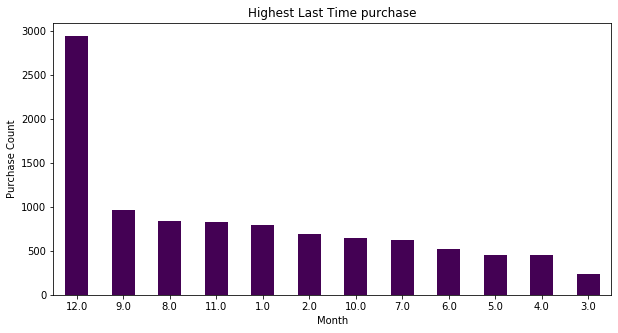

In [20]:
figure = plt.figure(figsize=(10,5))
fig = pd.value_counts(df['Prod.Buy.First Month'],sort=True)
fig.plot(kind='bar',rot=0,cmap='viridis')
plt.title('Highest Last Time purchase')
plt.xlabel('Month')
plt.ylabel('Purchase Count')


In [21]:
df.isnull().sum()

Createdat                   0
Emailpermissionstatus       0
Cont.Acq.Src               57
Email.Src.First          3726
Segment                     0
Email.Acq.Dt             3726
Email.Pref.Ch.Dt           57
Entry.Point.List           57
Cont.Acq.Src2              57
Cont.Acq.Dte               57
Prod.Buy.Last            1520
Prod.Buy.First           1520
Prod.Buy.Idpd            5401
Country                     0
Eml.Sent.Num              141
Eml.Sent.First.Ts        2121
Eml.Sent.Last.Ts         2121
Eml.Open.Num              141
Eml.Open.First.Ts        6217
Eml.Open.Last.Ts         6217
Eml.Click.Num             141
Email.Domain                0
Em.Pref.Status              0
Em.Pref.Dte                 0
Prod.Buy.First Year         0
Prod.Buy.First Month        0
Prod.Buy.Last Year          0
Prod.Buy.Last Month         0
dtype: int64

### Replacing missing values with their highest rank values for each column

In [22]:

df['Cont.Acq.Src'].value_counts()
df['Cont.Acq.Src'] = df['Cont.Acq.Src'].replace(np.nan,'OOBWIN15')

df['Email.Pref.Ch.Dt_Year'] = pd.DatetimeIndex(df['Email.Pref.Ch.Dt']).year.fillna(2019)
df['Email.Pref.Ch.Dt_month'] = pd.DatetimeIndex(df['Email.Pref.Ch.Dt']).month.fillna(12)

df['Entry.Point.List'].value_counts()
df['Entry.Point.List'] = df['Entry.Point.List'].replace(np.nan,'|OOBWIN1506|')

df['Cont.Acq.Src2'].value_counts()
df['Cont.Acq.Src2'] = df['Cont.Acq.Src2'].replace(np.nan,'OOBWIN15')

df['Cont.Acq.Dte'].value_counts()
df['Cont.Acq.Dte_year'] = pd.DatetimeIndex(df['Cont.Acq.Dte']).year.fillna(2019)
df['Cont.Acq.Dte_month'] = pd.DatetimeIndex(df['Cont.Acq.Dte']).month.fillna(12)


In [23]:
df['Eml.Click.Num'].value_counts().head()

0.0    8404
1.0     761
2.0     300
3.0     134
4.0      71
Name: Eml.Click.Num, dtype: int64

In [24]:
df['Eml.Click.Num'] = df['Eml.Click.Num'].fillna(0.0)

In [25]:
df['Eml.Open.Num'].value_counts().head()

0.0    6076
1.0    1157
2.0     604
3.0     354
4.0     269
Name: Eml.Open.Num, dtype: int64

In [26]:
df['Eml.Open.Num']=df['Eml.Open.Num'].fillna(0.0)

In [27]:
df['Eml.Sent.Num'].value_counts().head()

0.0    1980
2.0    1312
3.0     928
1.0     919
4.0     703
Name: Eml.Sent.Num, dtype: int64

In [28]:
df['Eml.Sent.Num']=df['Eml.Sent.Num'].fillna(0.0)

In [29]:
df['Eml.Sent.First.Ts'].value_counts().head()

2019-11-25    1159
2019-12-24     320
2019-07-23     200
2019-12-25     180
2019-09-05      92
Name: Eml.Sent.First.Ts, dtype: int64

In [30]:
df['Eml.Sent.First.Ts_year'] = pd.DatetimeIndex(df['Eml.Sent.First.Ts']).year.fillna(2019)
df['Eml.Sent.First.Ts_month'] = pd.DatetimeIndex(df['Eml.Sent.First.Ts']).month.fillna(11)

In [31]:
df['Eml.Sent.Last.Ts'].value_counts().head()

2019-12-24    2612
2020-02-20    1426
2020-01-13    1176
2020-02-14     323
2020-02-17     207
Name: Eml.Sent.Last.Ts, dtype: int64

In [32]:
df['Eml.Sent.Last.Ts_year'] = pd.DatetimeIndex(df['Eml.Sent.Last.Ts']).year.fillna(2019)
df['Eml.Sent.Last.Ts_month'] = pd.DatetimeIndex(df['Eml.Sent.Last.Ts']).month.fillna(11)

In [33]:
df['Email.Src.First'].value_counts().head()
df['Email.Src.First'] = df['Cont.Acq.Src2'].replace(np.nan,'OOBWIN15')

In [34]:
df['Email.Acq.Dt'].value_counts().head()


2019-12-25    178
2019-09-04     92
2019-09-12     77
2019-09-13     53
2019-09-05     51
Name: Email.Acq.Dt, dtype: int64

In [35]:
df['Email.Acq.Dt_year'] = pd.DatetimeIndex(df['Email.Acq.Dt']).year.fillna(2019)
df['Email.Acq.Dt_month'] = pd.DatetimeIndex(df['Email.Acq.Dt']).month.fillna(9) # As most of them are in 8th n 9th month

In [36]:
df['Prod.Buy.Idpd'].value_counts().head()

2019-12-25    177
2019-09-04     99
2019-09-05     55
2019-12-26     41
2019-12-06     40
Name: Prod.Buy.Idpd, dtype: int64

In [37]:
df['Prod.Buy.Idpd_year'] = pd.DatetimeIndex(df['Prod.Buy.Idpd']).year.fillna(2019)
df['Prod.Buy.Idpd_month'] = pd.DatetimeIndex(df['Prod.Buy.Idpd']).month.fillna(12)

In [38]:
df['Eml.Open.First.Ts'].value_counts().head()


2019-11-26    226
2019-12-24    126
2019-12-25     53
2019-11-27     49
2019-11-28     38
Name: Eml.Open.First.Ts, dtype: int64

In [39]:
df['Eml.Open.First.Ts_year'] = pd.DatetimeIndex(df['Eml.Open.First.Ts']).year.fillna(2019)
df['Eml.Open.First.Ts_month'] = pd.DatetimeIndex(df['Eml.Open.First.Ts']).month.fillna(12) # 12th and 11th months has more

In [40]:
df['Eml.Open.Last.Ts'].value_counts().head()

2020-02-17    234
2020-02-18    185
2019-12-24    141
2020-01-13    112
2019-11-26    101
Name: Eml.Open.Last.Ts, dtype: int64

In [41]:
df['Eml.Open.Last.Ts_year'] = pd.DatetimeIndex(df['Eml.Open.Last.Ts']).year.fillna(2019)
df['Eml.Open.Last.Ts_month'] = pd.DatetimeIndex(df['Eml.Open.Last.Ts']).month.fillna(12)

### Dropping of original column values having NAN

In [42]:
df.drop(['Prod.Buy.First','Prod.Buy.Last','Email.Acq.Dt','Email.Pref.Ch.Dt',
        'Cont.Acq.Dte','Prod.Buy.Last','Prod.Buy.First','Prod.Buy.Idpd',
        'Eml.Sent.First.Ts','Eml.Sent.Last.Ts','Eml.Open.First.Ts',
         'Eml.Open.Last.Ts'], axis=1,inplace=True) 
#Dropping original combined date columns

In [43]:
df.isnull().sum()

Createdat                  0
Emailpermissionstatus      0
Cont.Acq.Src               0
Email.Src.First            0
Segment                    0
Entry.Point.List           0
Cont.Acq.Src2              0
Country                    0
Eml.Sent.Num               0
Eml.Open.Num               0
Eml.Click.Num              0
Email.Domain               0
Em.Pref.Status             0
Em.Pref.Dte                0
Prod.Buy.First Year        0
Prod.Buy.First Month       0
Prod.Buy.Last Year         0
Prod.Buy.Last Month        0
Email.Pref.Ch.Dt_Year      0
Email.Pref.Ch.Dt_month     0
Cont.Acq.Dte_year          0
Cont.Acq.Dte_month         0
Eml.Sent.First.Ts_year     0
Eml.Sent.First.Ts_month    0
Eml.Sent.Last.Ts_year      0
Eml.Sent.Last.Ts_month     0
Email.Acq.Dt_year          0
Email.Acq.Dt_month         0
Prod.Buy.Idpd_year         0
Prod.Buy.Idpd_month        0
Eml.Open.First.Ts_year     0
Eml.Open.First.Ts_month    0
Eml.Open.Last.Ts_year      0
Eml.Open.Last.Ts_month     0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
Createdat                  10000 non-null datetime64[ns]
Emailpermissionstatus      10000 non-null object
Cont.Acq.Src               10000 non-null object
Email.Src.First            10000 non-null object
Segment                    10000 non-null object
Entry.Point.List           10000 non-null object
Cont.Acq.Src2              10000 non-null object
Country                    10000 non-null object
Eml.Sent.Num               10000 non-null float64
Eml.Open.Num               10000 non-null float64
Eml.Click.Num              10000 non-null float64
Email.Domain               10000 non-null object
Em.Pref.Status             10000 non-null object
Em.Pref.Dte                10000 non-null datetime64[ns]
Prod.Buy.First Year        10000 non-null float64
Prod.Buy.First Month       10000 non-null float64
Prod.Buy.Last Year         10000 non-null float64
Prod.Buy.Last Month        10000 non-

### Check the time period when highest number of email accounts are created

In [45]:
df['Createdat_year'] = pd.DatetimeIndex(df['Createdat']).year
df['Createdat_month'] = pd.DatetimeIndex(df['Createdat']).month

In [46]:
df['Createdat_year'].value_counts()

2019    8099
2020    1901
Name: Createdat_year, dtype: int64

In [47]:
df['Createdat_month'].value_counts()

12    1565
9     1358
8     1167
1      876
11     866
2      806
10     767
7      714
6      609
5      543
4      510
3      219
Name: Createdat_month, dtype: int64

### Conclusion5:  Highest number of email accounts were created during August,Sept and Dec 2019 

In [48]:
df.drop(['Createdat'],axis=1,inplace=True)

### Check the time period for email preference

In [49]:
df['Em.Pref.Dte_year'] = pd.DatetimeIndex(df['Em.Pref.Dte']).year
df['Em.Pref.Dte_month'] = pd.DatetimeIndex(df['Em.Pref.Dte']).month

df['Em.Pref.Dte_year'].value_counts()

2019    8062
2020    1826
2017      20
2015      18
2018      16
2016      15
2012       9
2014       7
2009       7
2008       6
2013       4
2007       3
2011       3
2010       3
2004       1
Name: Em.Pref.Dte_year, dtype: int64

In [50]:
df['Em.Pref.Dte_month'].value_counts()

12    1603
9     1353
8     1188
11     949
1      881
2      759
10     747
7      694
6      587
5      518
4      482
3      239
Name: Em.Pref.Dte_month, dtype: int64

In [51]:
df.drop(['Em.Pref.Dte'],axis=1,inplace=True)

### Conclusion6:  Highest number of email preference date during August,Sept and Dec 2019 

In [52]:
df.columns

Index(['Emailpermissionstatus', 'Cont.Acq.Src', 'Email.Src.First', 'Segment',
       'Entry.Point.List', 'Cont.Acq.Src2', 'Country', 'Eml.Sent.Num',
       'Eml.Open.Num', 'Eml.Click.Num', 'Email.Domain', 'Em.Pref.Status',
       'Prod.Buy.First Year', 'Prod.Buy.First Month', 'Prod.Buy.Last Year',
       'Prod.Buy.Last Month', 'Email.Pref.Ch.Dt_Year',
       'Email.Pref.Ch.Dt_month', 'Cont.Acq.Dte_year', 'Cont.Acq.Dte_month',
       'Eml.Sent.First.Ts_year', 'Eml.Sent.First.Ts_month',
       'Eml.Sent.Last.Ts_year', 'Eml.Sent.Last.Ts_month', 'Email.Acq.Dt_year',
       'Email.Acq.Dt_month', 'Prod.Buy.Idpd_year', 'Prod.Buy.Idpd_month',
       'Eml.Open.First.Ts_year', 'Eml.Open.First.Ts_month',
       'Eml.Open.Last.Ts_year', 'Eml.Open.Last.Ts_month', 'Createdat_year',
       'Createdat_month', 'Em.Pref.Dte_year', 'Em.Pref.Dte_month'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
Emailpermissionstatus      10000 non-null object
Cont.Acq.Src               10000 non-null object
Email.Src.First            10000 non-null object
Segment                    10000 non-null object
Entry.Point.List           10000 non-null object
Cont.Acq.Src2              10000 non-null object
Country                    10000 non-null object
Eml.Sent.Num               10000 non-null float64
Eml.Open.Num               10000 non-null float64
Eml.Click.Num              10000 non-null float64
Email.Domain               10000 non-null object
Em.Pref.Status             10000 non-null object
Prod.Buy.First Year        10000 non-null float64
Prod.Buy.First Month       10000 non-null float64
Prod.Buy.Last Year         10000 non-null float64
Prod.Buy.Last Month        10000 non-null float64
Email.Pref.Ch.Dt_Year      10000 non-null float64
Email.Pref.Ch.Dt_month     10000 non-null float64
C

### Perform Label Encoding

In [54]:
dt = df.copy()
dt.head()

,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Entry.Point.List,Cont.Acq.Src2,Country,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num,...,Prod.Buy.Idpd_year,Prod.Buy.Idpd_month,Eml.Open.First.Ts_year,Eml.Open.First.Ts_month,Eml.Open.Last.Ts_year,Eml.Open.Last.Ts_month,Createdat_year,Createdat_month,Em.Pref.Dte_year,Em.Pref.Dte_month
0,I,LIDUAS16,LIDUAS16,CON,|LIDUAS1608|OOBAND1407|OOBWIN1506|,LIDUAS16,US,228.0,41.0,1.0,...,2019.0,12.0,2017.0,3.0,2020.0,2.0,2019,4,2019,8
1,U,OOBWIN15,OOBWIN15,CON,|OOBWIN1506|,OOBWIN15,US,2.0,0.0,0.0,...,2019.0,12.0,2019.0,12.0,2019.0,12.0,2019,10,2019,10
2,I,NETMINNG,NETMINNG,CON,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,NETMINNG,US,121.0,4.0,0.0,...,2019.0,7.0,2019.0,7.0,2020.0,2.0,2019,7,2019,7
3,I,EPI2,EPI2,CON,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,EPI2,US,15.0,2.0,2.0,...,2019.0,11.0,2016.0,7.0,2016.0,8.0,2019,11,2019,11
4,U,OOBWIN15,OOBWIN15,CON,|OOBWIN1506|,OOBWIN15,US,20.0,1.0,1.0,...,2019.0,12.0,2019.0,5.0,2019.0,5.0,2019,4,2019,4


In [55]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [56]:
dt['Emailpermissionstatus_cat'] = labelEncoder.fit_transform(dt['Emailpermissionstatus'])
dt['Cont.Acq.Src_cat'] = labelEncoder.fit_transform(dt['Cont.Acq.Src'])
dt['Email.Src.First_cat'] = labelEncoder.fit_transform(dt['Email.Src.First'])
dt['Segment_cat'] = labelEncoder.fit_transform(df['Segment'])
dt['Entry.Point.List_cat'] = labelEncoder.fit_transform(dt['Entry.Point.List'])
dt['Cont.Acq.Src2_cat'] = labelEncoder.fit_transform(dt['Cont.Acq.Src2'])
dt['Country_cat'] = labelEncoder.fit_transform(dt['Country'])
dt['Email.Domain_cat'] = labelEncoder.fit_transform(dt['Email.Domain'])
dt['Em.Pref.Status_cat'] = labelEncoder.fit_transform(dt['Em.Pref.Status'])


In [57]:
dt.head()

,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Entry.Point.List,Cont.Acq.Src2,Country,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num,...,Em.Pref.Dte_month,Emailpermissionstatus_cat,Cont.Acq.Src_cat,Email.Src.First_cat,Segment_cat,Entry.Point.List_cat,Cont.Acq.Src2_cat,Country_cat,Email.Domain_cat,Em.Pref.Status_cat
0,I,LIDUAS16,LIDUAS16,CON,|LIDUAS1608|OOBAND1407|OOBWIN1506|,LIDUAS16,US,228.0,41.0,1.0,...,8,0,43,43,1,429,43,1,347,0
1,U,OOBWIN15,OOBWIN15,CON,|OOBWIN1506|,OOBWIN15,US,2.0,0.0,0.0,...,10,2,54,54,1,442,54,1,398,2
2,I,NETMINNG,NETMINNG,CON,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,NETMINNG,US,121.0,4.0,0.0,...,7,0,48,48,1,347,48,1,398,0
3,I,EPI2,EPI2,CON,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,EPI2,US,15.0,2.0,2.0,...,11,0,16,16,1,364,16,1,347,0
4,U,OOBWIN15,OOBWIN15,CON,|OOBWIN1506|,OOBWIN15,US,20.0,1.0,1.0,...,4,2,54,54,1,442,54,1,398,2


In [58]:
dt_cat = dt.drop(['Emailpermissionstatus','Cont.Acq.Src','Email.Src.First','Segment',
                  'Entry.Point.List','Cont.Acq.Src2','Country','Email.Domain','Em.Pref.Status'],axis=1)

In [59]:
dt_cat.head()

,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num,Prod.Buy.First Year,Prod.Buy.First Month,Prod.Buy.Last Year,Prod.Buy.Last Month,Email.Pref.Ch.Dt_Year,Email.Pref.Ch.Dt_month,Cont.Acq.Dte_year,...,Em.Pref.Dte_month,Emailpermissionstatus_cat,Cont.Acq.Src_cat,Email.Src.First_cat,Segment_cat,Entry.Point.List_cat,Cont.Acq.Src2_cat,Country_cat,Email.Domain_cat,Em.Pref.Status_cat
0,228.0,41.0,1.0,2019.0,4.0,2019.0,8.0,2019.0,8.0,2017.0,...,8,0,43,43,1,429,43,1,347,0
1,2.0,0.0,0.0,2019.0,10.0,2019.0,10.0,2019.0,10.0,2019.0,...,10,2,54,54,1,442,54,1,398,2
2,121.0,4.0,0.0,2019.0,7.0,2019.0,7.0,2019.0,7.0,2019.0,...,7,0,48,48,1,347,48,1,398,0
3,15.0,2.0,2.0,2016.0,7.0,2019.0,11.0,2019.0,11.0,2015.0,...,11,0,16,16,1,364,16,1,347,0
4,20.0,1.0,1.0,2019.0,4.0,2019.0,4.0,2019.0,4.0,2019.0,...,4,2,54,54,1,442,54,1,398,2


In [60]:
dt_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
Eml.Sent.Num                 10000 non-null float64
Eml.Open.Num                 10000 non-null float64
Eml.Click.Num                10000 non-null float64
Prod.Buy.First Year          10000 non-null float64
Prod.Buy.First Month         10000 non-null float64
Prod.Buy.Last Year           10000 non-null float64
Prod.Buy.Last Month          10000 non-null float64
Email.Pref.Ch.Dt_Year        10000 non-null float64
Email.Pref.Ch.Dt_month       10000 non-null float64
Cont.Acq.Dte_year            10000 non-null float64
Cont.Acq.Dte_month           10000 non-null float64
Eml.Sent.First.Ts_year       10000 non-null float64
Eml.Sent.First.Ts_month      10000 non-null float64
Eml.Sent.Last.Ts_year        10000 non-null float64
Eml.Sent.Last.Ts_month       10000 non-null float64
Email.Acq.Dt_year            10000 non-null float64
Email.Acq.Dt_month           10000 non-null float64
Prod.Buy

### Correlation of 'Emailpermissionstatus_cat' with other features

In [61]:
dt_cat_corr= dt_cat.corr()['Emailpermissionstatus_cat']
dt_cat_corr

Eml.Sent.Num                -0.129356
Eml.Open.Num                -0.045794
Eml.Click.Num               -0.064088
Prod.Buy.First Year          0.051493
Prod.Buy.First Month        -0.125257
Prod.Buy.Last Year           0.051642
Prod.Buy.Last Month         -0.121392
Email.Pref.Ch.Dt_Year        0.009634
Email.Pref.Ch.Dt_month      -0.017072
Cont.Acq.Dte_year            0.069132
Cont.Acq.Dte_month          -0.029806
Eml.Sent.First.Ts_year      -0.019023
Eml.Sent.First.Ts_month      0.128632
Eml.Sent.Last.Ts_year       -0.269581
Eml.Sent.Last.Ts_month       0.288460
Email.Acq.Dt_year            0.019601
Email.Acq.Dt_month           0.247108
Prod.Buy.Idpd_year          -0.002757
Prod.Buy.Idpd_month          0.029640
Eml.Open.First.Ts_year       0.024040
Eml.Open.First.Ts_month      0.079066
Eml.Open.Last.Ts_year       -0.051311
Eml.Open.Last.Ts_month       0.062222
Createdat_year               0.027567
Createdat_month             -0.016689
Em.Pref.Dte_year             0.059819
Em.Pref.Dte_

## Features of Customers who opt in 

In [62]:
dt_I = dt_cat[dt_cat['Emailpermissionstatus_cat']==0]

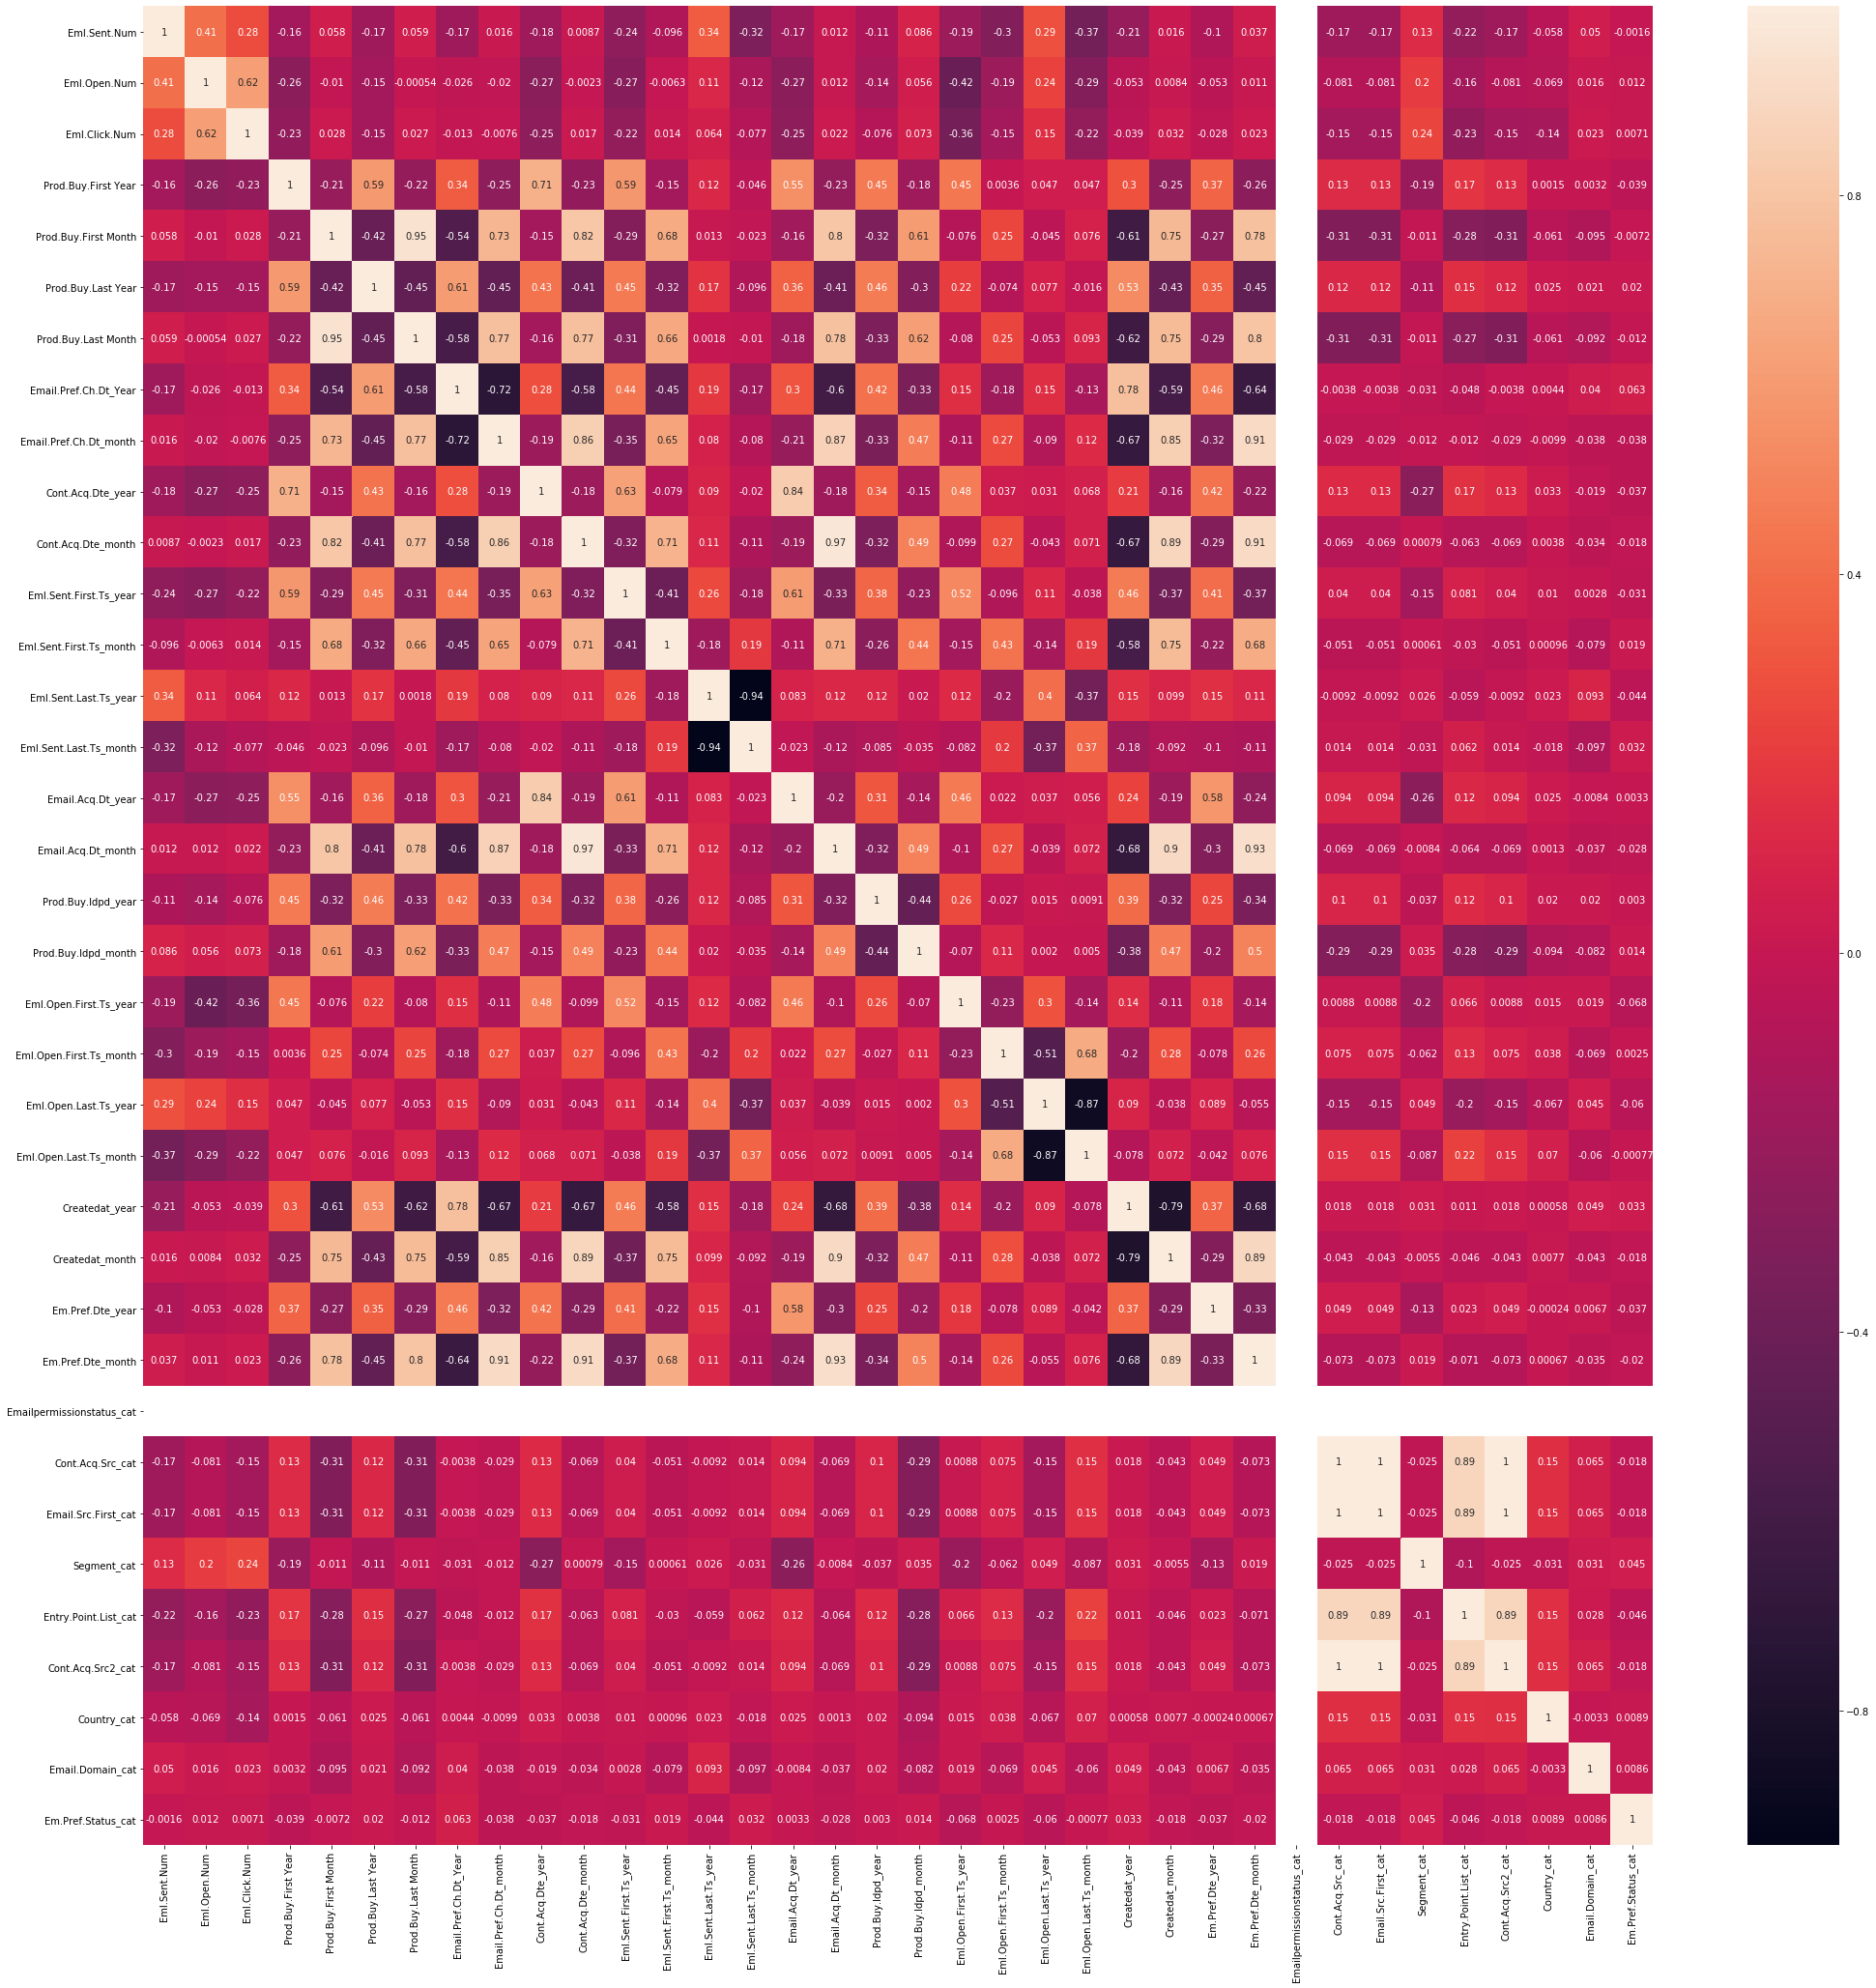

In [63]:
plt.figure(figsize=(35,35))
sns.heatmap(dt_I.corr(),annot=True)

## EDA of customers who Opt-in for Email

### Conclusion: Customers who Opt-in for purchases are likely the one's:
1. They are active customers who click on emails and who click and open emails often and hence, should be retained.
2. Purchase more during month of December (Sales can be targeted during this period of time)
3. Email Acquisition happened mostly in month of August and September (Notifying the customers to subscribe during this time would be great)



Text(0.5, 1.0, 'Purchase trend of Customer who opted in for email')

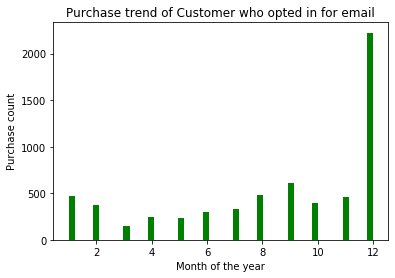

In [64]:
plt.hist('Prod.Buy.First Month',bins=50,data=dt_I,color='green')
plt.xlabel('Month of the year')
plt.ylabel('Purchase count')
plt.title('Purchase trend of Customer who opted in for email')

## EDA of customers who Opt-out for Email

In [65]:
dt_O = dt_cat[dt_cat['Emailpermissionstatus_cat']==1]

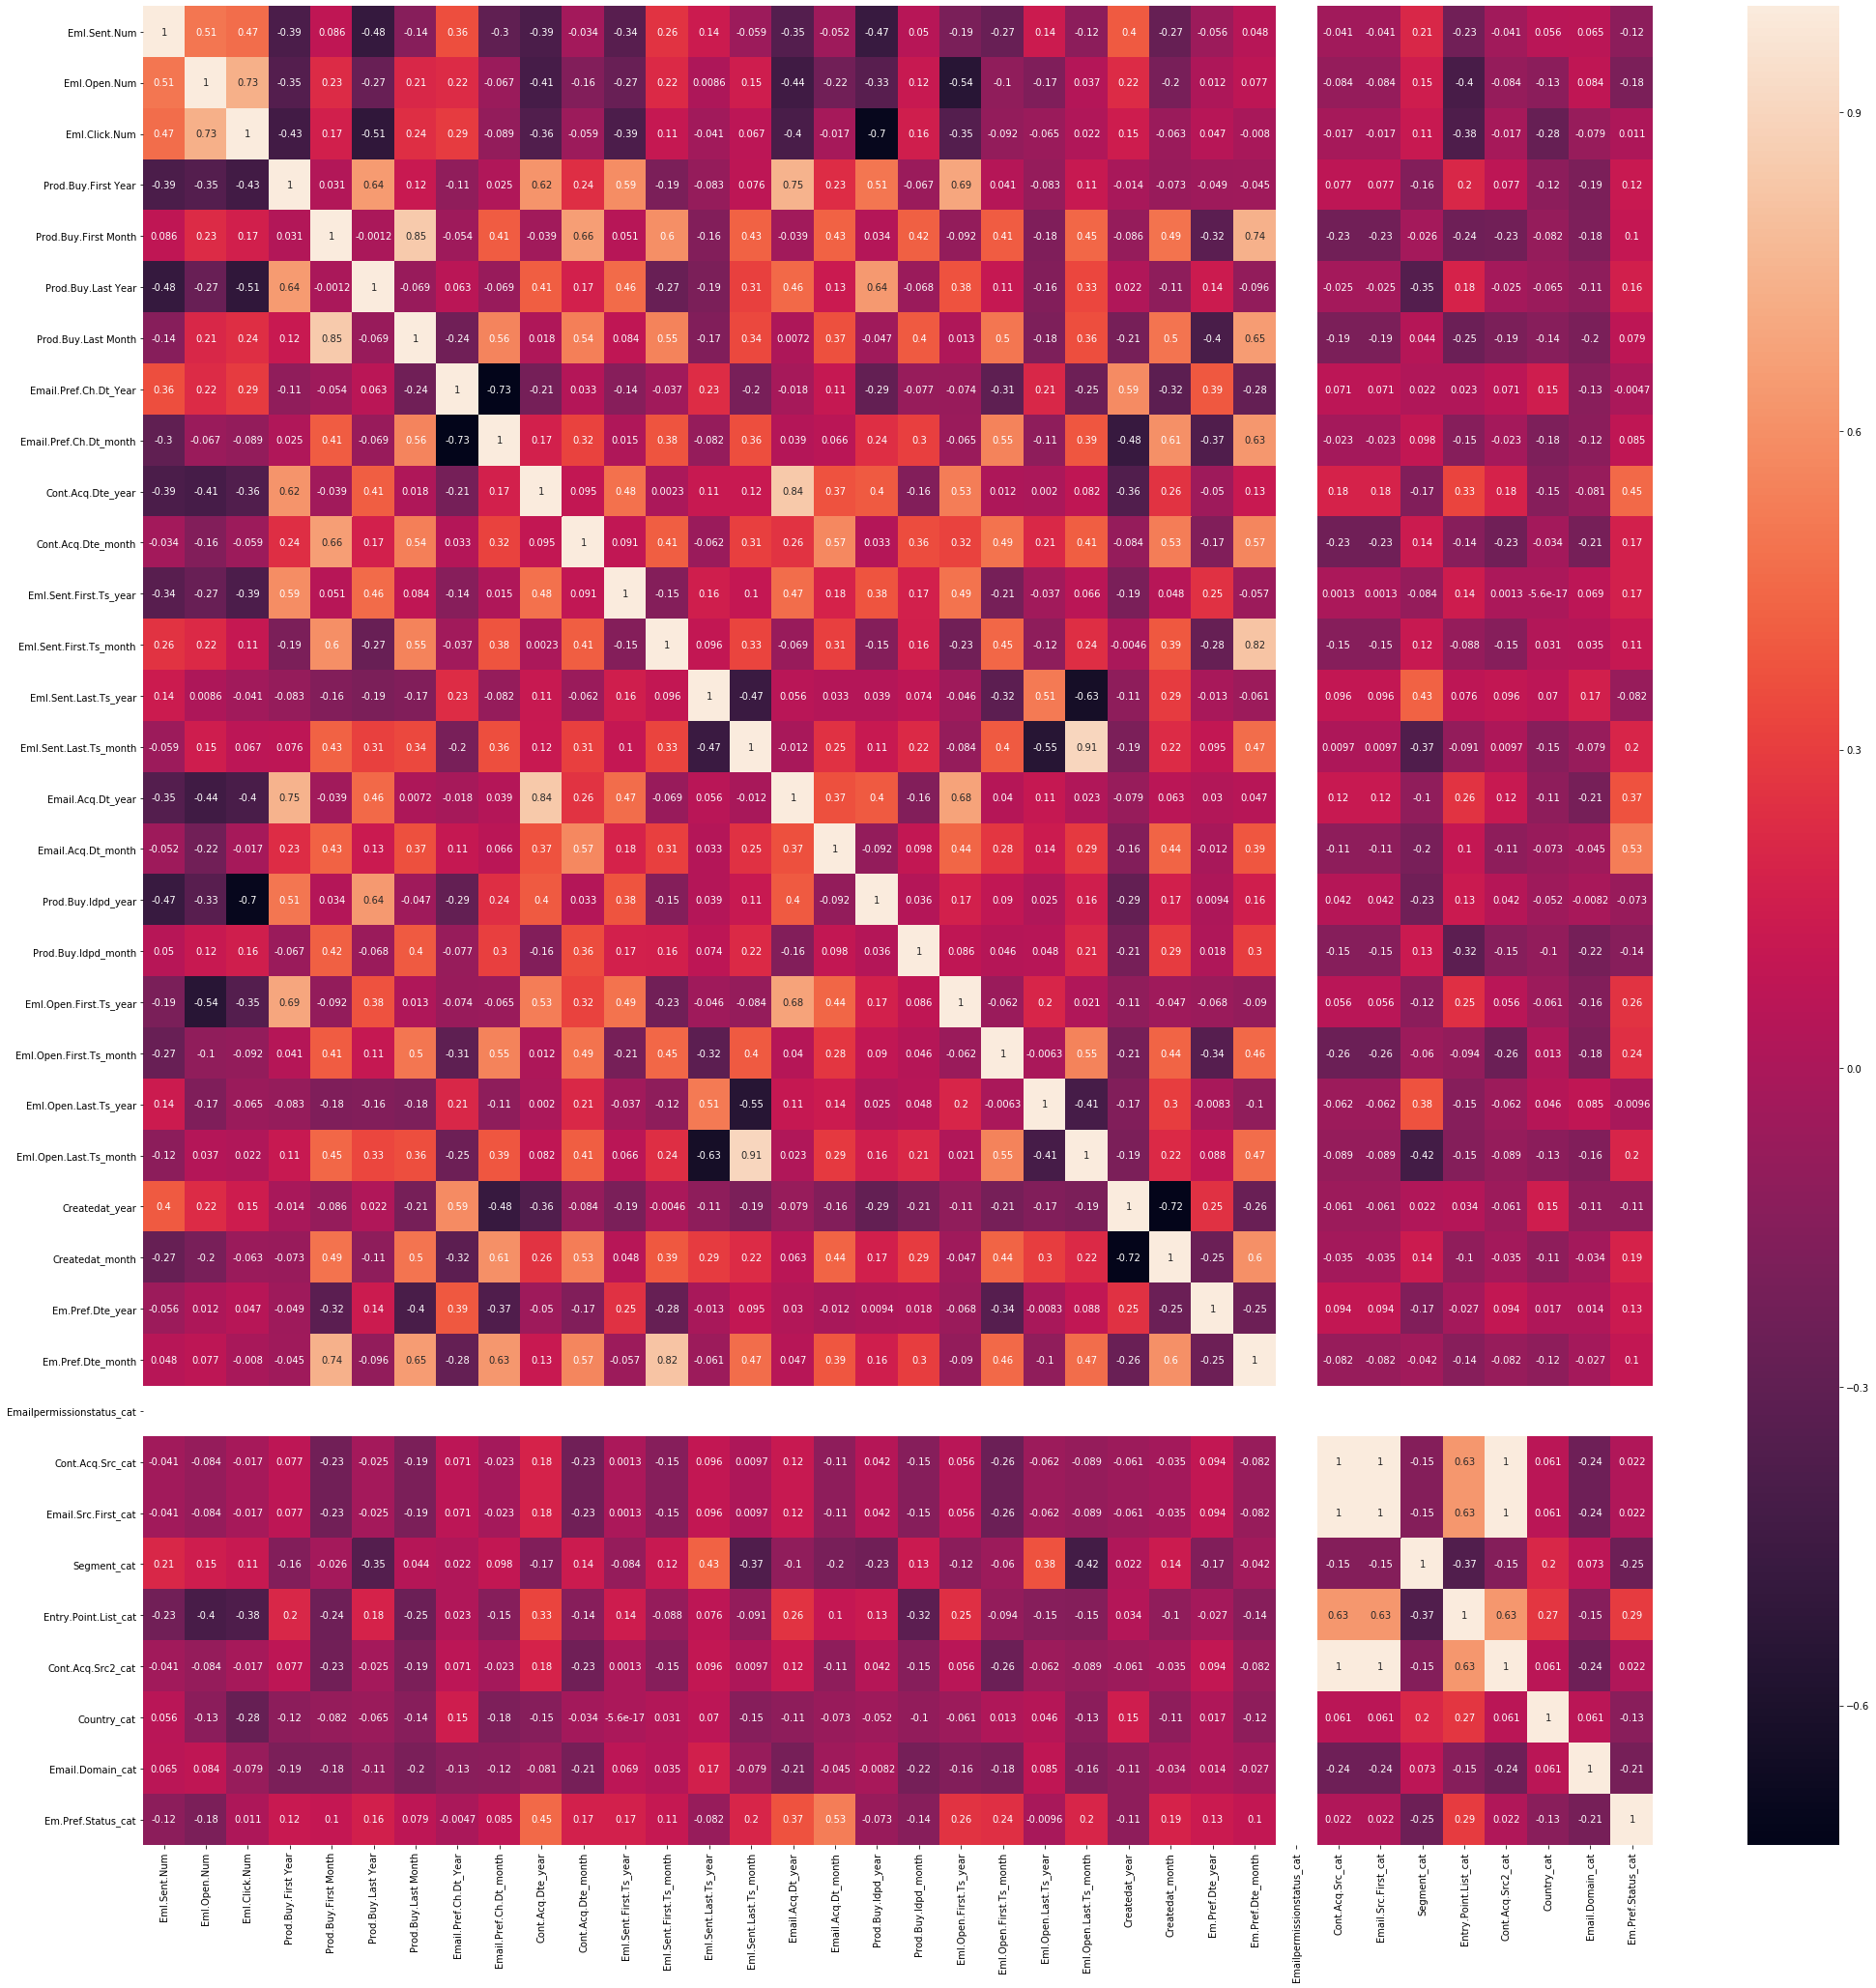

In [70]:
plt.figure(figsize=(35,35))
sns.heatmap(dt_O.corr(),annot=True)

### Conclusion: Customers who Opt-out for purchases are likely the one's:
1. They are customers who click on emails but do not sent emails often. Emails based on customrs interests can help in keeping them engaged and opt for better purchase options.
2. Lucrative offers based on Customer interest during festive season (December) can retain consumers.
3. Notifying the customers to subscribe during this time would be great.

We can focus on these areas for better Customer Retention

In [73]:
dt_U = dt_cat[dt_cat['Emailpermissionstatus_cat']==2]

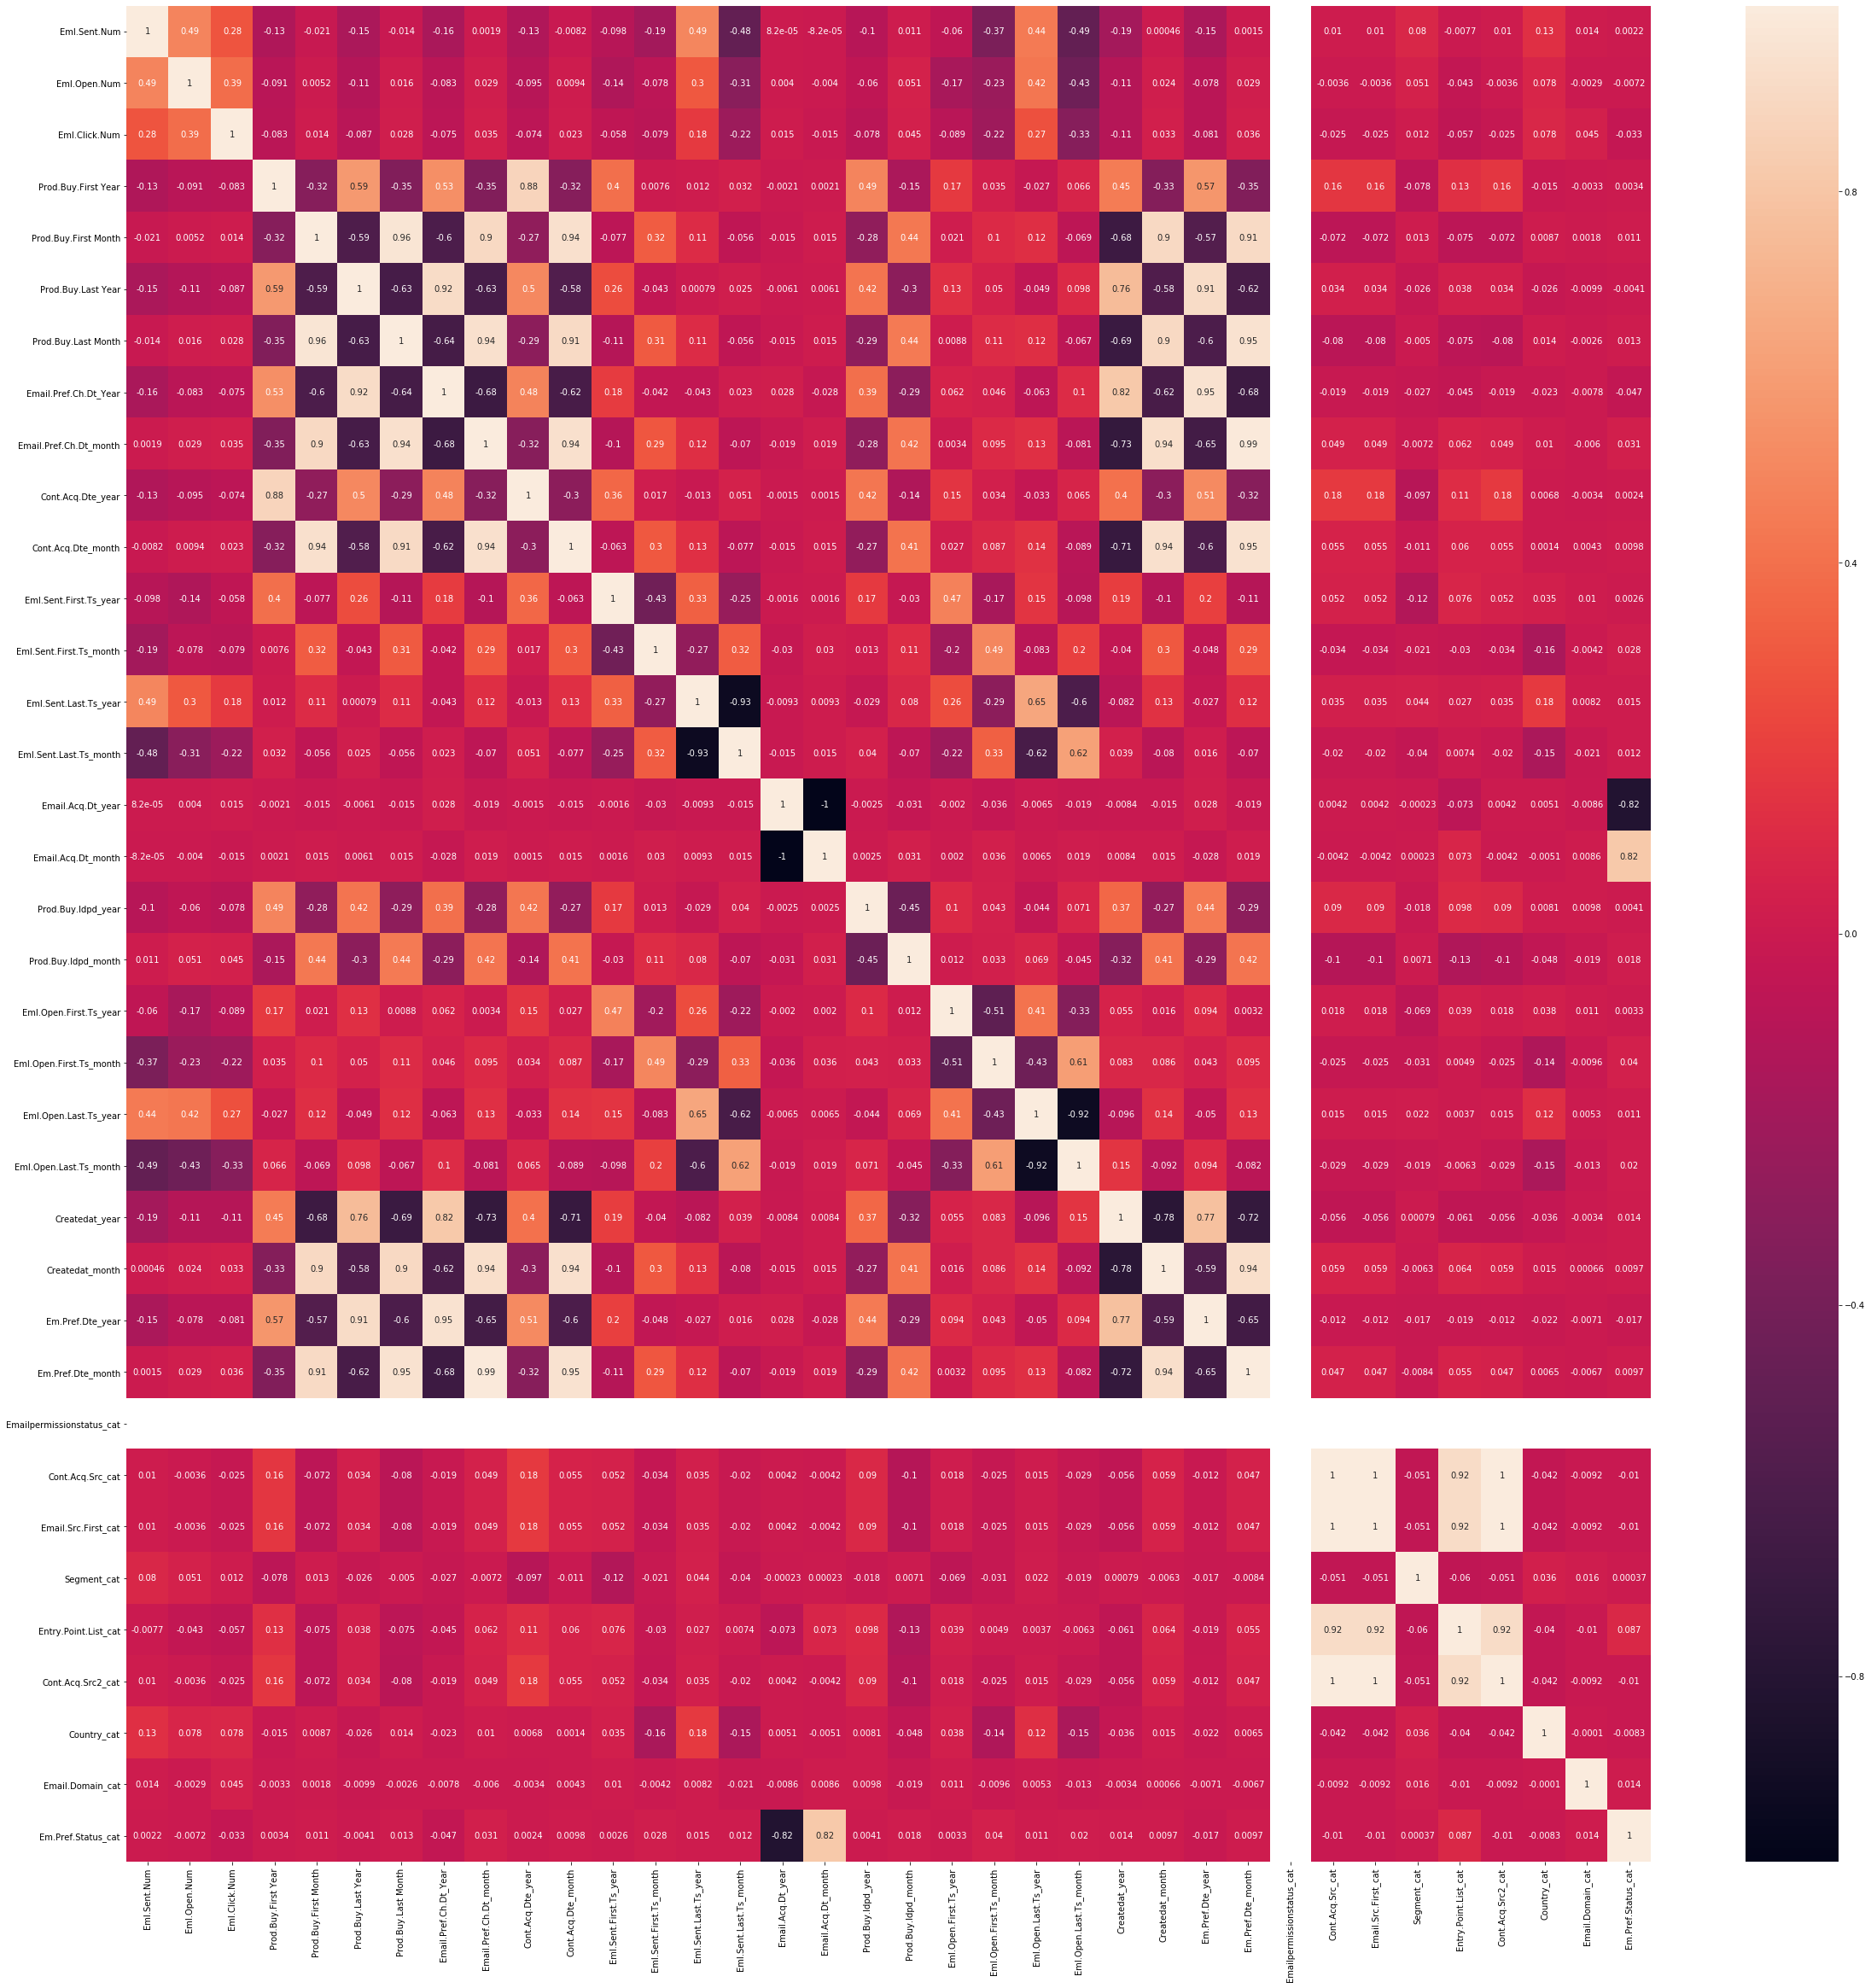

In [74]:
plt.figure(figsize=(40,40))
sns.heatmap(dt_U.corr(),annot=True)

### Conclusion: Customers who did not Opt-in for purchases are likely the one's:
The frequency of email checks, opening clicking mails and email acquistion is on lower side for these customers. They do not seem to be active users. Their purchase count seems to be seasonal and not very high.

Text(0.5, 1.0, 'Purchase trend of Customer who opted in for email')

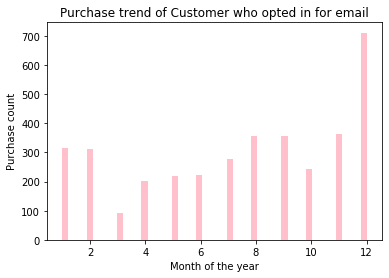

In [75]:
plt.hist('Prod.Buy.First Month',bins=50,data=dt_U,color='pink')
plt.xlabel('Month of the year')
plt.ylabel('Purchase count')
plt.title('Purchase trend of Customer who opted in for email')